In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [30]:
data=pd.read_csv('data.csv')



In [31]:
data.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0.0,no,20,yes,265000.00,1.9,130,male,no,1
1,55.0,0.0,no,38,no,263358.03,1.1,136,male,no,1
2,65.0,0.0,no,20,no,162000.00,1.3,129,male,yes,1
3,50.0,1.0,no,20,no,210000.00,1.9,137,male,no,1
4,65.0,1.0,yes,20,no,327000.00,2.7,116,female,no,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  301 non-null    float64
 1   anaemia              300 non-null    float64
 2   diabetes             301 non-null    object 
 3   ejection_fraction    301 non-null    int64  
 4   high_blood_pressure  299 non-null    object 
 5   platelets            301 non-null    float64
 6   serum_creatinine     301 non-null    float64
 7   serum_sodium         301 non-null    int64  
 8   sex                  298 non-null    object 
 9   smoking              301 non-null    object 
 10  DEATH_EVENT          301 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 26.0+ KB


In [33]:
data.smoking.unique()

array(['no', 'yes'], dtype=object)

In [34]:
data.isnull().sum()

age                    0
anaemia                1
diabetes               0
ejection_fraction      0
high_blood_pressure    2
platelets              0
serum_creatinine       0
serum_sodium           0
sex                    3
smoking                0
DEATH_EVENT            0
dtype: int64

In [35]:
data[data['high_blood_pressure'].isnull()]

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
230,60.0,0.0,no,30,NaN,62000.0,1.7,127,female,no,1
291,60.0,0.0,no,35,NaN,133000.0,1.4,139,male,no,0


In [36]:
data=data.dropna()

In [37]:
data.isnull().sum()


age                    0
anaemia                0
diabetes               0
ejection_fraction      0
high_blood_pressure    0
platelets              0
serum_creatinine       0
serum_sodium           0
sex                    0
smoking                0
DEATH_EVENT            0
dtype: int64

<AxesSubplot:xlabel='ejection_fraction'>

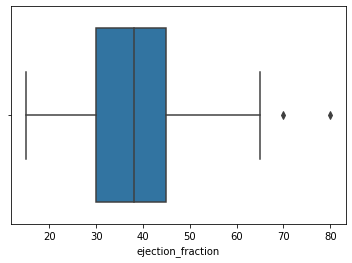

In [38]:
sns.boxplot(x=data['ejection_fraction'])

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['diabetes']=le.fit(data['diabetes']).transform(data['diabetes'])
data['high_blood_pressure']=le.fit(data['high_blood_pressure']).transform(data['high_blood_pressure'])
data['sex']=le.fit(data['sex']).transform(data['sex'])
data['smoking']=le.fit(data['smoking']).transform(data['smoking'])

In [25]:
data.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0.0,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0.0,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0.0,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1.0,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1.0,1,20,0,327000.00,2.7,116,0,0,1


In [26]:
data.corr()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.073457,-0.109623,0.047537,0.087098,-0.060164,0.144649,-0.047961,0.066271,0.017273,0.252587
anaemia,0.073457,1.000000,-0.021193,0.020037,0.021770,-0.058352,0.038628,0.033868,-0.099763,-0.116385,0.063718
diabetes,-0.109623,-0.021193,1.000000,-0.016826,-0.011075,0.079934,-0.046824,-0.098894,-0.153058,-0.136311,-0.000549
ejection_fraction,0.047537,0.020037,-0.016826,1.000000,0.016296,0.060899,-0.015169,0.162200,-0.147320,-0.073104,-0.262015
high_blood_pressure,0.087098,0.021770,-0.011075,0.016296,1.000000,0.023522,-0.015774,0.042833,-0.099546,-0.058213,0.079617
platelets,-0.060164,-0.058352,0.079934,0.060899,0.023522,1.000000,-0.046246,0.043693,-0.130943,0.009077,-0.036099
serum_creatinine,0.144649,0.038628,-0.046824,-0.015169,-0.015774,-0.046246,1.000000,-0.185528,-0.000015,-0.044083,0.289539
serum_sodium,-0.047961,0.033868,-0.098894,0.162200,0.042833,0.043693,-0.185528,1.000000,-0.029404,0.004956,-0.172186
sex,0.066271,-0.099763,-0.153058,-0.147320,-0.099546,-0.130943,-0.000015,-0.029404,1.000000,0.448009,-0.008094
smoking,0.017273,-0.116385,-0.136311,-0.073104,-0.058213,0.009077,-0.044083,0.004956,0.448009,1.000000,-0.019689


In [39]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()

dataEncoded=enc.fit(data[['diabetes','high_blood_pressure','sex','smoking']]).transform(data[['diabetes','high_blood_pressure','sex','smoking']])

In [43]:
temp=pd.DataFrame(dataEncoded.toarray(),columns=enc.get_feature_names())

In [46]:
newDf=pd.concat([temp,data[['age', 'anaemia',  'ejection_fraction',
        'platelets', 'serum_creatinine', 'serum_sodium',
        'DEATH_EVENT']]], axis=1, join='inner')

In [47]:
newDf.head()

,x0_no,x0_yes,x1_no,x1_yes,x2_female,x2_male,x3_no,x3_yes,age,anaemia,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,75.0,0.0,20,265000.00,1.9,130,1
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,55.0,0.0,38,263358.03,1.1,136,1
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,65.0,0.0,20,162000.00,1.3,129,1
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,50.0,1.0,20,210000.00,1.9,137,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,65.0,1.0,20,327000.00,2.7,116,1


In [51]:
X,Y=newDf[['x0_no', 'x0_yes', 'x1_no', 'x1_yes', 'x2_female', 'x2_male', 'x3_no',
       'x3_yes', 'age', 'anaemia', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']], newDf['DEATH_EVENT']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test=train_test_split(X,Y, test_size=.33, random_state=42)


In [55]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,Y_train)

KNeighborsClassifier()

In [56]:
predicted=model.predict(X_test)

In [57]:
predicted

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [61]:
errors =abs(predicted - y_test)

1-round(np.mean(errors),2)

0.71

In [62]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,predicted)

In [63]:
cm

array([[59,  8],
       [20,  9]], dtype=int64)

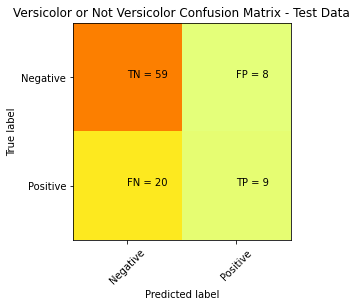

In [67]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()